# Métodos de agrupación - Clustering
_Clustering_ se refiere a un conjunto muy amplio de técnicas para encontrar _subgrupos_, o clusters, en un conjunto de datos. Cuando agrupamos las observaciones de un conjunto de datos, buscamos dividirlas en grupos distintos de modo que las observaciones _dentro de cada grupo_ sean bastante similares entre sí, mientras que las observaciones en _diferentes grupos_ sean muy diferentes entre sí. Por supuesto, para concretar esta idea, debemos definir lo que significa que dos o más observaciones sean _similares o diferentes_. De hecho, esto es a menudo una consideración específica del contexto que debe hacerse basándose en el conocimiento de los datos que se están estudiando.

Por ejemplo, supongamos que tenemos un conjunto de n observaciones, cada una con p características. Las n observaciones podrían corresponder a muestras de tejido para pacientes con cáncer de mama, y las características de p podrían corresponder a las mediciones recogidas para cada muestra de tejido; estas podrían ser mediciones clínicas, como etapa o grado tumoral, o podrían ser medidas de expresión génica. Podemos tener una razón para creer que hay cierta heterogeneidad entre las n muestras de tejido; por ejemplo, quizás hay algunos subtipos diferentes desconocidos de cáncer de mama. Para encontrar estos subgrupos se podrían utilizar métodos de agrupamiento. Este es un problema no supervisado porque estamos tratando de descubrir la estructura -en este caso, los clusters distintos- sobre la base de un conjunto de datos.

El objetivo en los problemas supervisados, por otro lado, es tratar de predecir algún vector de resultado como el tiempo de supervivencia o la respuesta a un tratamiento farmacológico. Tanto el Agrupamiento como el PCA buscan simplificar los datos a través de un pequeño número de resúmenes, pero sus mecanismos son diferentes:

- El PCA busca encontrar una representación de baja dimensión de las observaciones que explican una buena proporción de la varianza
- El Agrupamiento busca encontrar subgrupos homogéneos entre las observaciones.

Otra aplicación de la agrupación surge en mercadeo. Podemos tener acceso a un gran número de mediciones (por ejemplo, ingreso mediano del hogar, ocupación, distancia del área urbana más cercana, etc.) para un gran número de personas. Nuestro objetivo es realizar la segmentación del mercado mediante la identificación de subgrupos de personas que podrían ser más receptivos a una determinada forma de publicidad, o más propensos a comprar un producto en particular. La tarea de realizar segmentación del mercado equivale a identificar grupos de personas en el conjunto de datos.

Dado que el agrupamiento es popular en muchos campos, existe un gran número de métodos de agrupación. En esta sección nos centraremos en los dos enfoques de agrupación más conocidos: _**agrupación K-means y agrupación jerárquica**_. En la agrupación K-means, buscamos dividir las observaciones en un número pre-especificado de grupos. Por otra parte, en la agrupación jerárquica, no sabemos de antemano cuántos grupos queremos; de hecho, terminamos con una representación visual en forma de árbol de las observaciones, llamada _dendrograma_, que nos permite ver las agrupaciones obtenidas para cada número posible de clusters, de 1 a n. Hay ventajas y desventajas para cada uno de estos enfoques de agrupamiento, que se señalarán más adelante.

En general, podemos **agrupar las observaciones** sobre la base de las características con el fin de identificar los subgrupos entre las observaciones, o podemos **agrupar las características** sobre la base de las observaciones con el fin de descubrir subgrupos entre las características. En lo que sigue, por simplicidad, discutiremos el agrupamiento de las observaciones sobre la base de las características, aunque lo contrario se puede realizar simplemente transponiendo la matriz de datos.

## Agrupación de K-Means
El agrupamiento K-means es un enfoque simple y elegante para particionar un conjunto de datos en K clústeres distintos que no se superponen. Para realizar la agrupación de K- means, primero debemos especificar el número K deseado de clusters; entonces el algoritmo K-means asignará cada observación a exactamente uno de los K clusters. La siguiente figura muestra los resultados obtenidos al realizar el agrupamiento de K-means en un ejemplo simulado consistente de 150 observaciones en dos dimensiones, usando tres valores diferentes de K.

![fig37](./assets/fig37.png)

> La idea detrás de la agrupación de K-means es que un _buen_ agrupamiento es aquel para el cual la variación _intra-cluster_ es lo más pequeña posible. En otras palabras, queremos dividir las observaciones en K grupos de manera que la variación total dentro del grupo, sumada para todos los K grupos, sea lo más pequeña posible. Para llevar esto acabo, necesitamos definir lo que es la _variación dentro del grupo_ y hay muchas maneras posibles de definir este concepto, pero la opción más común implica usar la _distancia cuadrática Euclidiana_. En otras palabras, la variación intra-grupo para el k-ésimo grupo es la suma de todas las distancias cuadráticas Euclidianas obtenidas entre pares de observaciones en el k-ésimo grupo, dividido por el número total de observaciones en el k-ésimo grupo.

El procedimiento de agrupación K-means resulta de un problema matemático simple e intuitivo que no discutiremos aquí y que esta bien explicado en el libro recomendado para tal fin.

---
**El Algoritmo del Agrupamiento K-Means:**

1. Asigne aleatoriamente un número, de 1 a K, a cada una de las n observaciones. Estos sirven como asignaciones de clúster inicial para las observaciones.
2. Itere hasta que las asignaciones del clúster dejen de cambiarse:
    - a) Para cada uno de los K clústeres, calcule el _centroide_ del clúster. El k-ésimo centroide del agrupamiento es el vector de las medias de las p características para las observaciones en el k-ésimo grupo.
    - b) Asigne cada observación al grupo cuyo centroide es el más cercano (donde _más cercano_ se define usando la distancia Euclidiana).

---

En el Paso 2(a) las medias del grupo para cada característica son las constantes que minimizan suma de cuadrado de las desviaciones, y en el paso 2(b), la reasignación de las observaciones sólo puede mejorar la minimización. Esto significa que a medida que se ejecuta el algoritmo, el agrupamiento obtenido mejorará continuamente hasta que el resultado ya no cambie; cuando el resultado ya no cambia, se ha alcanzado un _óptimo local_.

La siguiente figura muestra la progresión del algoritmo en el ejemplo simulado de la anterior figura. El agrupamiento K-means deriva su nombre del hecho de que en el paso 2(a), los centroides del grupo se calculan como la media de las observaciones asignadas a cada grupo.

![fig38](./assets/fig38.png)

El progreso del algoritmo de K-means en el ejemplo de la Figura 3.7 con K = 3. **Arriba a la izquierda**: se muestran las observaciones. **Centro superior**: en el paso 1 del algoritmo, cada observación se asigna al azar a un grupo. **Arriba a la derecha**: en el paso 2a, los centroides del clúster se calculan. Estos se muestran como grandes discos de color. Inicialmente, los centroides se superponen casi por completo, ya que las asignaciones de grupos iniciales se eligieron al azar. **Abajo a la izquierda**: en el paso 2b, cada observación se asigna al centroide más cercano. **Centro inferior**: El paso 2a se lleva a cabo de nuevo, dando lugar a nuevos centroides de agrupamiento. **Inferior a la derecha**: resultados obtenidos tras diez iteraciones.

Debido a que el algoritmo K-means encuentra un óptimo local en lugar de un óptimo global, los resultados obtenidos dependerán de la asignación del agrupamiento inicial (al azar) de cada observación en el Paso 1 del Algoritmo. Por esta razón, es importante ejecutar el algoritmo varias veces desde diferentes configuraciones iniciales aleatorias. Entonces se selecciona la mejor solución, es decir, aquella para la cual el objetivo es menor.

Como hemos visto, para realizar el agrupamiento K-means, debemos decidir cuántos clusters esperamos en los datos. El problema de seleccionar K está lejos de ser simple. Este problema, junto con otras consideraciones prácticas que surgen al realizar el agrupamiento K-means, se tratarán en una sección más adelante.

### Ejemplo K-mean generando datos aleatorios

In [4]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

#
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

### K=2

In [10]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=int32)

### K=3

In [12]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [15]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [16]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2], dtype=int32)

In [18]:
# Suma de las distancias de los ejemplos a sus centros mas cercanos de cada grupo 
km2.inertia_

68.973792009397258

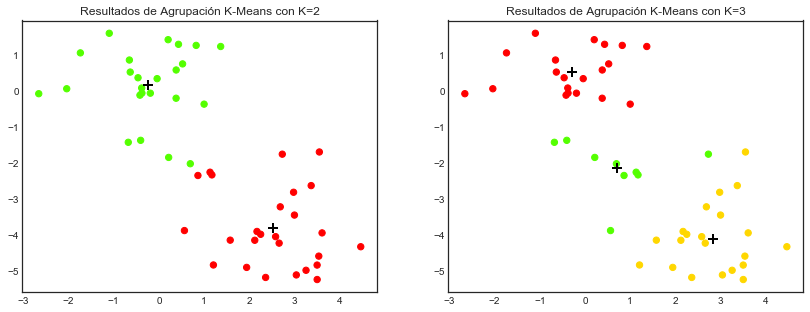

In [19]:
# Gráficamos
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('Resultados de Agrupación K-Means con K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('Resultados de Agrupación K-Means con K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Ejemplo de Agrupamiento K-mean utilizando R

``` R
# Clustering
# -------------------------------------------------------------------------------
# K-means:
# -------------------------------------------------------------------------------
# ejemplo simulado para dos variables en el cual realmente existen dos clusters en los datos:
# las primeras 25 observaciones tienen un vector de medias (3, -4) y
# las siguientes 25 observations vector de medias (0, 0).

# simulación de los datos
set.seed(2)
x=matrix (rnorm (50*2) , ncol =2)
x[1:25 ,1]=x[1:25 ,1]+3
x[1:25 ,2]=x[1:25 ,2]-4
x
plot(x)

km.out=kmeans(x, 2, nstart =20)   # aplicación del algoritmo K-means para x con 20 configuraciones iniciales
km.out

names(km.out)
km.out$cluster    # muestra la asignación de las observaciones a los clusters
km.out$centers    # muestra los centroides de cada cluster
km.out$size       # muestra los tamaños (número de observaciones) de cada cluster

plot(x, col=(km.out$cluster+1) , main="Agrupamiento K-Means 
Resultados con K=2", xlab ="X1", ylab="X2", pch=1, cex=1)

# En el mundo real, en general no se conoce el verdadero número de clusters.
# El ejercicio anterior puede ser realizado K = 3.
set.seed (4)
km.out=kmeans(x, 3, nstart =20)
km.out

plot(x, col=(km.out$cluster+1) , main="Agrupamiento K-Means 
Resultados con K=3", xlab ="X1", ylab="X2", pch=20, cex=2)

# efectos del cambio del número de asignaciones iniciales a los clusters
# compare los rsultados usando nstart=1 y nstart=20.
set.seed(3)
(km.out=kmeans (x,3, nstart=1))
km.out$tot.withinss
km.out$withinss

(km.out=kmeans(x,3, nstart=20))
km.out$tot.withinss
km.out$withinss

# observe que km.out$tot.withinss es la suma de cuadrados total dentro de clusters,
# la cual se busca minimizar usando K-Means. La suma de cuadrados individual dentro 
# del cluster se encuentran en el vector km.out$withinss.

# se recomienda siempre correr el agrupamiento K-Means con un valor grande para
# nstart, tal como 20 or 50, puesto que en otro caso se puede llegar a un óptimo local 

# cuando se corre el agrupamiento K-Means, además de usar varias asignaciones iniciales 
# a los clusters, tambión es importante asignar una semilla aleatoria 
# usando la función set.seed(). De esta manera, las asignaciones iniciales de los clusters
# de la Etapa 1 puede ser replicada, y la salida de K-Means será completamente
# reproducible.
```

## Agrupación jerárquica
Una desventaja potencial de la agrupación K-means es que nos obliga a pre-especificar el número K de clusters. El _agrupamiento jerárquico_ es un enfoque alternativo que no requiere una elección particular de K. El agrupamiento jerárquico tiene una ventaja adicional sobre el agrupamiento K-means y es que produce una atractiva representación en forma de árbol de cómo se agrupan las observaciones, llamado _dendrograma_.

En esta sección, se describe el agrupamiento _ascendente_ (de abajo hacia arriba) o _aglomerativo_. Este es el tipo más común de agrupamiento jerárquico, y se refiere al hecho de que un dendrograma (generalmente representado como un árbol al revés) se construye partiendo de las hojas y combinando los clusters hasta llegar al tronco. Comenzaremos con una discusión sobre cómo interpretar un dendrograma y luego se discutirá cómo se realiza la agrupación jerárquica, es decir, cómo se construye el dendrograma.

### Interpretación de un dendrograma
Considere con el conjunto de datos simulados que se muestra en la siguiente Figura, el cual consta de 45 observaciones en el espacio bidimensional. Los datos se generaron a partir de un modelo con tres clases; los rótulos de las clases a las cuales pertenecen las observaciones se muestran en colores distintos. Sin embargo, supongamos que los datos se observaron sin sus rótulos, y que queremos realizar una agrupación jerárquica de los datos.

![fig310](./assets/fig310.png)

El agrupamiento jerárquico (con un enlace completo, que se discutirá más adelante) produce el resultado que se muestra en el panel izquierdo de la siguiente figura. **¿Cómo podemos interpretar este dendrograma?**

![fig311](./assets/fig311.png)

En el panel izquierdo, cada _hoja_ del dendrograma representa una de las 45 observaciones de la anterior figura. Sin embargo, a medida que avanzamos por el árbol, algunas hojas comienzan a _fusionarse_ en ramas. Estas corresponden a observaciones que son similares entre sí. A medida que nos movemos más arriba del árbol, las ramas se fusionan, ya sea con hojas u otras ramas. Cuanto más rápido (más bajo en el árbol) se producen las fusiones, más similares son los grupos de observaciones entre sí. Por otro lado, las observaciones que se funden más tarde (cerca de la parte superior del árbol) pueden ser muy diferentes. De hecho, esta afirmación puede ser precisada: para cualquier dos observaciones, podemos buscar el punto en el árbol donde se fusionan las ramas que contienen esas dos observaciones.

La altura de esta fusión, medida en el eje vertical, indica cuán diferentes son las dos observaciones. Por lo tanto, las observaciones que se funden en la parte inferior del árbol son muy similares entre sí, mientras que las observaciones que se fusionan cerca de la parte superior del árbol tienden a ser muy diferentes.

Esto pone de relieve un punto muy importante en la interpretación de los dendrogramas que a menudo se malinterpreta. Consideremos el panel izquierdo de la siguiente figura, que muestra un dendrograma obtenido de una agrupación jerárquica de nueve observaciones. Se puede ver que las observaciones 5 y 7 son bastante similares entre sí, ya que se fusionan en el punto más bajo del dendrograma. Las observaciones 1 y 6 también son bastante similares entre sí. Sin embargo, es tentador pero incorrecto concluir de la figura que las observaciones 9 y 2 son bastante similares entre sí sobre la base de que se encuentran cerca una de la otra en el dendrograma. De hecho, basándose en la información contenida en el dendrograma, la observación 9 no es más similar a la observación 2 que a las observaciones 8, 5 y 7. (_Esto puede verse en el panel derecho de la siguiente figura, en la que se muestran los datos originales_). Para ponerlo matemáticamente, hay $2^{n-1}$ posibles reordenamientos del dendrograma, donde n es el número de hojas. Esto se debe a que en cada uno de los n-1 puntos donde se producen fusiones, las posiciones de las dos ramas fusionadas podrían ser intercambiadas sin afectar el significado del dendrograma.

![fig312](./assets/fig312.png)

Por lo tanto, no podemos sacar conclusiones sobre la similitud de dos observaciones basadas en su proximidad a lo largo del eje horizontal. Más bien, sacamos conclusiones sobre la similitud de dos observaciones basadas en la ubicación en el eje vertical donde las ramas que contienen esas dos observaciones se fusionan primero.

Ahora que comprendemos cómo interpretar el panel de la izquierda de la primer figura o dendrograma, podemos pasar al problema de la identificación de los clusters usando un dendrograma. Para hacer esto, hacemos un corte horizontal a través del dendrograma, como se muestra en los paneles central y derecho de la misma figura. Los distintos conjuntos de observaciones por debajo del corte se pueden interpretar como grupos.

En el panel central, un corte en el dendrograma a una altura de nueve produce dos grupos, mostrados en colores distintos. En el panel derecho, cortar el dendrograma a una altura de cinco produce tres grupos.

Se pueden realizar cortes adicionales a medida que se desciende el dendrograma para obtener cualquier número de clusters, entre 1 (correspondiente a no cortar) y n (correspondiente a un corte a la altura 0, de modo que cada observación esté en su propio grupo). En otras palabras, la altura del corte al dendrograma cumple el mismo papel que el K en la agrupación K-means: controla el número de clusters obtenidos.

Por lo tanto, en el dendrograma destaca un aspecto muy atractivo de la agrupación jerárquica: se puede utilizar un solo dendrograma para obtener cualquier número de agrupaciones. En la práctica, se suele mirar el dendrograma y seleccionar a ojo un número razonable de clusters, basado en la altura de la fusión y el número de clusters deseados. En ocasiones uno puede escoger entre dos o tres o más grupos. Sin embargo, a menudo la elección de dónde cortar el dendrograma no es tan clara.

El término _jerárquico_ se refiere al hecho de que los grupos obtenidos cortando el dendrograma a una altura determinada están necesariamente anidados dentro de los grupos obtenidos cortando el dendrograma a cualquier altura mayor. Sin embargo, en un conjunto de datos arbitrarios, esta suposición de estructura jerárquica podría ser poco realista. Por ejemplo, supongamos que nuestras observaciones corresponden a un grupo de personas con una división 50-50 de hombres y mujeres, repartidas uniformemente entre estadounidenses, japoneses y franceses. Podemos imaginar un escenario en el que la mejor división en dos grupos podría dividir a estas personas por género, y la mejor división en tres grupos podría dividirlos por nacionalidad. En este caso, los verdaderos clusters no están anidados, en el sentido de que la mejor división en tres grupos no resulta de tomar la mejor división en dos grupos y dividir uno de esos grupos. En consecuencia, esta situación no podría estar bien representada por la _agrupación jerárquica_. Debido a situaciones como ésta, _el agrupamiento jerárquico puede a veces producir resultados peores (es decir, menos precisos) que el agrupamiento K-means para un número dado de clusters_.

### El algoritmo de agrupación jerárquica
El dendrograma de agrupamiento jerárquico se obtiene a través de un algoritmo extremadamente simple. Empezamos por definir algún tipo de _medida de disimilitud_ entre cada par de observaciones. Con frecuencia, se utiliza la distancia euclidiana; más adelante se discutirá la elección de la medida de disimilitud. El algoritmo procede iterativamente. Comenzando en la parte inferior del dendrograma, cada una de las n observaciones se trata como un grupo. Los dos clusters que son más similares entre sí se fusionan de manera que ahora hay n-1 clusters. A continuación, los dos clusters que son más similares entre sí se fusionan de nuevo, por lo que ahora hay n-2 clusters. El algoritmo procede de esta manera hasta que todas las observaciones pertenezcan a un único grupo y el dendrograma está completo. La siguiente figura muestra los primeros pasos del algoritmo, para los datos de la figura anterior. 

![fig313](./assets/fig313.png)

Una ilustración de los primeros pasos del algoritmo de agrupación jerárquica, usando enlace completo y la distancia euclidiana. **Arriba Izquierda**: inicialmente, hay nueve grupos distintos, {1}, {2},. . . , {9}. **Arriba Derecha**: los dos grupos que están más juntos, {5} y {7}, se fusionan en un solo grupo. **Abajo Izquierda**: los dos grupos que están más juntos, {6} y {1}, se fusionan en un solo grupo. **Arriba a la Derecha**: los dos clusters que están más juntos usando el enlace completo, {8} y el clúster {5, 7}, se fusionan en un solo grupo.

El algoritmo de agrupamiento jerárquico se da en el siuiente Algoritmo:

** Algoritmo de Agrupación jerárquica:**

1. Comience con n observaciones y una medida (como la distancia euclidiana) de la disimilitud de cada par de observaciones. Habrá un total (n | 2) = n(n -1)/2  medidas de disimilitud. Trate cada observación como un grupo.
2. Para i = n, n - 1,. . . , 2:
    * a) Examine todas las disimilitudes inter-clusters entre parejas de clusters para los i grupos e identifique el par de clusters que son menos disimilares (es decir, los más similares). Fusione estos dos grupos. La disimilitud entre estos dos grupos indica la altura en el dendrograma en el que la fusión tuvo lugar.
    * b) Calcule las nuevas disimilitudes entre clústeres entre parejas entre los i - 1 grupos restantes.

Este algoritmo parece bastante simple, pero aún falta determinar cómo se deben fusionar los grupos. Considere el panel inferior derecho en la figura anterior. ¿Cómo determinamos que el grupo {5, 7} debe fusionarse con el grupo {8}?

Definimos un concepto de la disimilitud entre pares de observaciones, pero ¿cómo podemos definir la disimilitud entre dos grupos si uno o ambos contienen múltiples observaciones? El concepto de disimilitud entre un par de observaciones debe extenderse a un par de _grupos de observaciones_.

Esta extensión se logra desarrollando la noción de enlace, la cual define la disimilitud entre dos grupos de observaciones. Los cuatro tipos más comunes de enlace -completo, promedio, simple y centroide- se describen brevemente a continuación:

** Descripción de los enlaces**

**Completo**
Máxima disimilitud inter-cluster. Calcula todas las disimilitudes entre pares de observaciones en el grupo A y las observaciones en el grupo B, y registra la _mayor_ de estas disimilitudes.

**Simple**
Mínima disimilaridad inter-cluster. Calcula todas disimilitudes entre pares de observaciones en el grupo A y las observaciones en el grupo B, y registra la _menor_ de estas disimilitudes. El enlace simple puede dar lugar a agrupaciones extendidas en las que se fusionan observaciones solas una a una.

**Promedio**
Disimilaridad inter-cluster media. Calcula todas disimilitudes entre pares de observaciones en el grupo A y las observaciones en el grupo B, y registra el _promedio_ de estas disimilitudes.

**Centroide**
Disimilaridad entre el centroide para el grupo A (el vector de medias de longitud p) y el centroide para el grupo B. El enlace centroide puede dar lugar a inversiones indeseables.

---

Los enlaces promedio, completo y simple son los más populares entre los estadísticos. Generalmente se prefiere un enlace medio y completo con respecto a un enlace simple, ya que tienden a producir dendrogramas más equilibrados. El enlace centroide se utiliza a menudo en genómica, pero sufre de un inconveniente importante en que puede ocurrir una inversión, lo que sígnifica que dos grupos se fusionan a una altura por debajo de cualquiera de los grupos individuales en el dendrograma. Esto puede conducir a dificultades en la visualización, así como en la interpretación del dendrograma. Las disimilitudes calculadas en el paso 2(b) del algoritmo de agrupamiento jerárquico dependerán del tipo de enlace utilizado, así como de la elección de la medida de disimilitud. Por lo tanto, el dendrograma resultante depende típicamente muy fuertemente del tipo de enlace utilizado, como se muestra en la siguiente figura.

![fig314](./assets/fig314.png)

### Elección de la medida de disimilitud
Hasta ahora, los ejemplos de este capítulo han utilizado la distancia Euclidiana como medida de disimilitud. Pero a veces pueden ser preferidas otras medidas de disimilitud. Por ejemplo, la distancia basada en la correlación considera que dos observaciones son similares si sus características están altamente correlacionadas, aunque los valores observados pueden estar muy separados en términos de distancia Euclidiana. Este es un uso inusual de la correlación, la cual normalmente se calcula entre variables; aquí se calcula entre los perfiles de la observación para cada par de observaciones. La siguiente figura ilustra la diferencia entre la distancia Euclidiana y la basada en correlación. La distancia basada en la correlación se centra en las formas de los perfiles de la observación más que en sus magnitudes.

![fig315](./assets/fig315.png)

Se muestran tres observaciones con mediciones en 20 variables. Las observaciones 1 y 3 tienen valores similares para cada variable y por lo tanto hay una pequeña distancia euclídea entre ellos. Pero están muy débilmente correlacionados, por lo que tienen una gran correlación basada en la distancia. Por otro lado, las observaciones 1 y 2 tienen valores muy diferentes para cada variable, por lo que existe una gran distancia euclidiana entre ellos. Pero están altamente correlacionados, por lo que hay una pequeña correlación basada en la distancia entre ellos.

La elección de la medida de disimilitud es muy importante, ya que tiene un fuerte efecto sobre el dendrograma resultante. En general, se debe prestar mucha atención al tipo de datos que se agrupan y al problema científico que nos ocupa. Estas consideraciones deben determinar qué tipo de medida de disimilitud se utiliza para la agrupación jerárquica.

Por ejemplo, considere a un minorista en línea (on line) interesado en agrupar a los compradores en función de sus historias de compras pasadas. El objetivo es identificar subgrupos de compradores _similares_, de modo que a los compradores dentro de cada subgrupo se les pueden mostrar artículos y publicidad que probablemente les interesará.

Supongamos que los datos toman la forma de una matriz donde las filas son los compradores y las columnas son los artículos disponibles para la compra; los elementos de la matriz de datos indican el número de veces que un comprador determinado ha comprado un artículo determinado (es decir, un 0 si el comprador nunca ha comprado este artículo, un 1 si el comprador lo ha comprado una vez, etc.). Qué tipo de medida de disimilitud debería utilizarse para agrupar a los compradores? Si se usa la distancia Euclidiana, los compradores que han comprado muy pocos artículos en general (es decir, usuarios poco frecuentes del sitio de compras en línea) se agruparán. Esto puede no ser deseable. Por otro lado, si se utiliza la distancia basada en correlación, los compradores con preferencias similares (por ejemplo, los compradores que han comprado los artículos A y B pero nunca los artículos C o D) se agruparán, incluso si algunos compradores con estas preferencias compran más alto volumen que otros. Por lo tanto, para esta aplicación, la distancia basada en la correlación puede ser una mejor opción.

Además de seleccionar cuidadosamente la medida de disimilitud utilizada, también se debe considerar si las variables deben ser escaladas de forma que tengan una desviación estándar de uno antes de calcular la disimilitud entre las observaciones. Para ilustrar este punto, consideremos de nuevo el ejemplo de compras en línea que acabamos de describir. Algunos artículos se pueden comprar con más frecuencia que otros; por ejemplo, un comprador podría comprar diez pares de calcetines al año, pero muy raramente una computadora. Por lo tanto, las compras de alta frecuencia, como los calcetines, tienden a tener un efecto mucho mayor sobre las disimilitudes entre los compradores que las compras eventuales de computadoras, y esto afectará el agrupamiento obtenido finalmente.

Esto puede no ser deseable. Si las variables se escalan para que tengan una desviación estándar de uno antes de que se calculen las disimilitudes inter-observación, entonces cada variable tendrá la misma importancia en el agrupamiento jerárquico realizado. También, si las variables están medidas en distintas escalas, podemos desear escalar las variables para tengan una desviación estándar de uno; de lo contrario, la elección de las unidades (por ejemplo, centímetros frente a kilómetros) para una variable particular afectará la medida de disimilitud obtenida. La decisión de escalar las variables antes de calcular la medida de disimilitud depende de la aplicación concreta. Un ejemplo se muestra en la siguiente figura.

![fig316](./assets/fig316.png)

Un minorista en línea vende dos artículos: calcetines y computadoras. **Izquierda**: se muestra el número de pares de calcetines y ordenadores, comprados por ocho compradores en línea. Cada comprador se muestra en un color diferente. Si las diferencias entre observaciones se calculan usando la _distancia Euclidiana_ en las variables originales, entonces el número de calcetines comprados por un individuo determinará las diferencias obtenidas, y el número de computadoras compradas tendrá poco efecto. Esto puede ser indeseable, ya que (1) las computadoras son más caras que los calcetines y por lo tanto el minorista en línea puede estar más interesado en estimular a los compradores a comprar computadoras en lugar de calcetines, y (2) Una gran diferencia en el número de calcetines comprados por dos compradores puede ser menos informativo sobre las preferencias de compras generales de los compradores que una pequeña diferencia en el número de ordenadores comprados. **Centro**: se muestran los mismos datos, después de escalar cada variable por su _desviación estándar_. Ahora el número de ordenadores comprados tendrá un efecto mucho mayor en las disimilitudes inter-observación obtenidas. **Derecha**: se muestran los mismos datos, pero ahora el eje vertical representa el número de dólares gastados por cada comprador en línea en calcetines y en computadoras. Dado que las computadoras son mucho más caras que los calcetines, ahora la historia de la compra de computadoras conducirá las disimilitudes inter- observaciones obtenidas.

Se debe tener en cuenta que la decisión de escalar o no las variables antes de realizar la agrupación también se aplica al agrupamiento K-means.

### Ejemplo de Agrupamiento Jerárquico utilizando R

``` R
# Cluster Jerárquico
# -------------------------------------------------------------------------------
hc.complete=hclust(dist(x), method="complete")
hc.average =hclust(dist(x), method="average")
hc.single =hclust(dist(x), method="single")

# gráfico de los dendrogramas
par(mfrow =c(1,3))
plot(hc.complete, main =" Complete Linkage ", xlab="", sub ="", cex =.7)
plot(hc.average, main =" Average Linkage ", xlab="", sub ="", cex =.7)
plot(hc.single, main=" Single Linkage ", xlab="", sub ="", cex =.7)

# para ver los clusters asociados a las observaciones para un corte dado en el
# dendrograma 
cutree(hc.complete, k=2)
cutree(hc.average, k=2)
cutree (hc.single , k=4)

xsc=scale(x)    # escala las variables antes de realizar el agrupamiento jerárquico
plot(hclust(dist(xsc), method ="complete"), main ="Agrupamiento Jerárquico
con caracetrísticas escaladas", cex=.7)

# distancia basada en la correlación pueden calcularse usnado la función as.dist().
# Sin embargo, esto tiene sentido cuando se tienen al menos 3 características,
# puesto que la correlación absoluta entre dos características siempore es 1.
# en el siguiente ejemplo se utiliza un consjunto de datos tridimensional.
(x=matrix (rnorm (30*3), ncol =3))
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method ="complete"), main="Enlace Completo
con distancia basada en Correlation", xlab="", sub="", cex=.7)
```

### Ejemplo de Agrupamiento Jerárquico

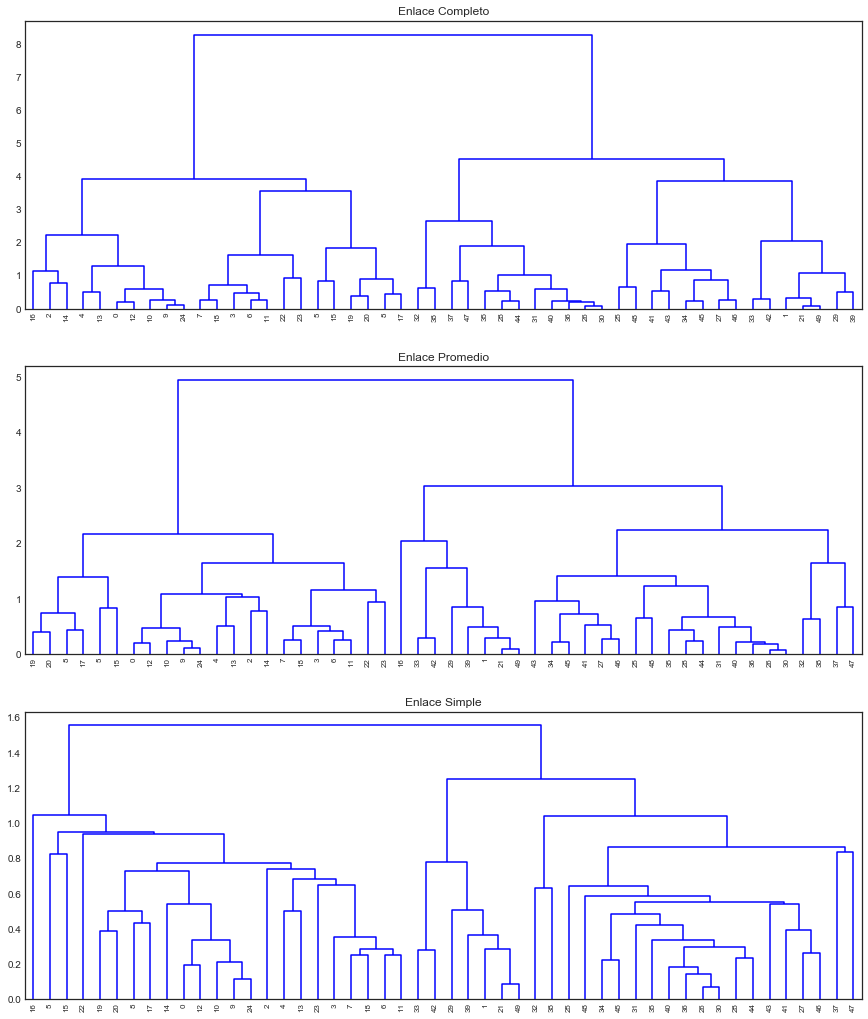

In [21]:
# Utilizando scipy
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Enlace Completo')
ax2.set_title('Enlace Promedio')
ax3.set_title('Enlace Simple');

## Aspectos prácticos del agrupamiento

El agrupamiento puede ser una herramienta muy útil para el análisis de datos en el entorno sin supervisión. Sin embargo, hay una serie de problemas que surgen al realizar el agrupamiento. Algunos de ellos son descritos a continuación.

### Pequeñas decisiones con grandes consecuencias
Para realizar el agrupamiento, se deben tomar algunas decisiones.

- ¿Deberían normalizarse de alguna manera las observaciones o las características?
Por ejemplo, tal vez las variables deben estar centradas para tener un valor medio cero y escaladas para que tengan una desviación estándar de uno.

- En el caso del agrupamiento jerárquico,
    - ¿Qué medida de disimilitud debe usarse?
    - ¿Qué tipo de enlace debe utilizarse?
    - ¿Dónde debemos cortar el dendrograma para obtener clusters?
    
- En el caso del agrupamiento K-means, ¿cuántos clusters debemos buscar en los datos?

Cada una de estas decisiones puede tener un fuerte impacto en los resultados obtenidos. En la práctica, intentamos varias opciones diferentes, y buscamos la que tiene la solución más útil o interpretable. Con estos métodos, no hay una sola respuesta correcta: cualquier solución que expone algunos aspectos interesantes de los datos debe ser considerada.

### Validación de los clusters obtenidos
Cada vez que se realiza un agrupamiento sobre un conjunto de datos, encontraremos clusters. Pero realmente queremos saber si los clusters que se han encontrado representan verdaderos subgrupos en los datos, o si son simplemente el resultado de _agrupar ruido_. Esta es una pregunta difícil de responder.

Existe una serie de técnicas para asignar un p-valor a un cluster con el fin de evaluar si hay más evidencia para la existencia del cluster de lo que se esperaría debido al azar. Sin embargo, no ha habido consenso sobre un solo enfoque óptimo. Más detalles se pueden encontrar en Hastie et al. (2009).

### Otras consideraciones en la agrupación
Tanto el agrupamiento K-means como el agrupamiento jerárquico asignará cada observación a un grupo. Sin embargo, a veces esto puede no ser apropiado. Por ejemplo, supongamos que la mayoría de las observaciones verdaderamente pertenecen a un pequeño número de subgrupos (desconocidos), y un pequeño subconjunto de las observaciones son muy diferentes entre sí y de todas las demás observaciones (por ejemplo, son observaciones atípicas). Entonces, ya que K-means y el clustering jerárquico obligan a cada observación a pertenecer a un cluster, los clusters encontrados pueden estar muy distorsionados debido a la presencia de _observaciones atípicas (outliers)_ que no pertenecen a ningún cluster.

Los modelos mixtos son un enfoque atractivo para acomodar la presencia de estos valores atípicos. Para esto existen versiones flexibles del agrupamiento K-means, las cuales se describen en Hastie et al. (2009). Además, se debe tener en cuenta que en general, los métodos de agrupamiento no son muy robustos a las perturbaciones de los datos. Por ejemplo, supongamos que agrupamos n observaciones, y luego agrupamos las observaciones de nuevo después de eliminar un subconjunto de m observaciones al azar. Uno esperaría que los dos grupos de clusters obtenidos serían bastante similares, pero con frecuencia esto no ocurre!

### Un enfoque recomendado para interpretar los resultados del agrupamiento
Hemos descrito algunos de los problemas asociados con el agrupamiento. Sin embargo, el agrupamiento puede ser una herramienta estadística muy útil y válida si se usa correctamente. Hemos mencionado que pequeñas decisiones sobre cómo debe realizarse el agrupamiento, tales como la estandarización de los datos y el tipo de enlace, pueden tener un gran efecto en los resultados. Por lo tanto, se recomienda realizar agrupamientos con diferentes opciones de estos parámetros y examinar el conjunto completo de resultados para ver qué patrones emergen consistentemente. Dado que el agrupamiento puede no ser robusto, se recomienda agrupar subconjuntos de los datos con el fin de obtener una idea de la robustez de los conglomerados obtenidos.

Lo más importante, debemos ser cuidadosos acerca de cómo se reportan los resultados de un análisis de agrupamiento. Estos resultados no deben tomarse como la verdad absoluta sobre un conjunto de datos. Más bien, deberían constituir un punto de partida para el desarrollo de una hipótesis científica y un estudio adicional, preferiblemente sobre un conjunto de datos independiente.


### Un ejemplo de agrupamiento con datos reales

NCI60 es una archivo con datos genómicos. Contiene 6830 mediciones de expresión genética (genes) sobre 64 líneas celulares de cáncer (tipo de cáncer). Los datos contienen 64 filas y 6830 columnas

In [22]:
# Se obtienen los datos exportando los datos a formato CSV desde R, leyendo los datos de ISLR.
# Existe un archivo para los atributos y otro para las clases o tipos.
NCI60_X = pd.read_csv('data/NCI60_X.csv').drop('Unnamed: 0', axis=1)
NCI60_X.columns = np.arange(NCI60_X.columns.size)
NCI60_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [24]:
X = pd.DataFrame(scale(NCI60_X))
X.shape

(64, 6830)

In [25]:
y = pd.read_csv('data/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [26]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
K562A-repro    1
MCF7D-repro    1
MCF7A-repro    1
UNKNOWN        1
Name: type, dtype: int64

### Análisis de componentes principales - PCA

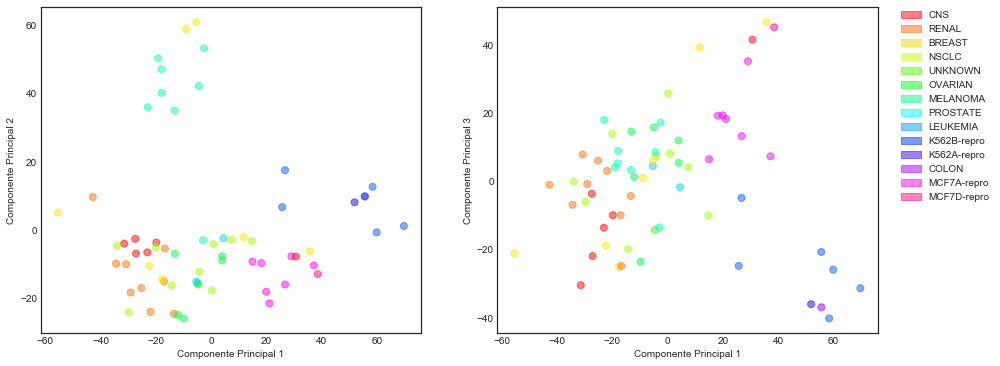

In [28]:
# Ajustar el modelo PCA y transformar X para obtener los componentes
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Gráfico izquierdo
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Componente Principal 2')
# Gráfico derecho
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Componente Principal 3')

# Leyendas para las clases (y) , dado que no realizamos el gráfico de dispersión por clase.
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Leyenda de la axisa X para ambos gráficos
for ax in fig.axes:
    ax.set_xlabel('Componente Principal 1')

In [29]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).as_matrix(), pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Desviación Estándar', 'Proporción de Varianza', 'Proporción Acumulada'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

                              PC1        PC2        PC3        PC4        PC5
Desviación Estándar     27.853469  21.481355  19.820465  17.032556  15.971807
Proporción de Varianza   0.113589   0.067562   0.057518   0.042476   0.037350
Proporción Acumulada     0.113589   0.181151   0.238670   0.281145   0.318495

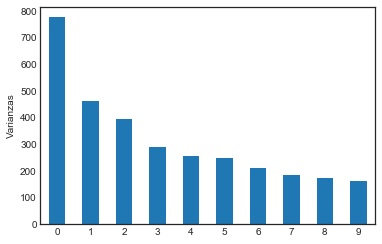

In [30]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Varianzas');

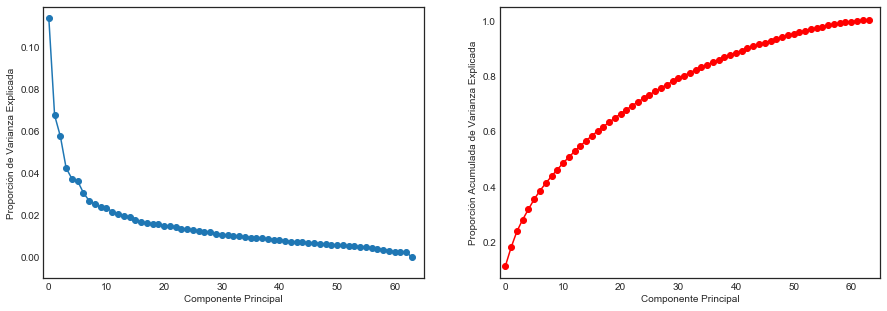

In [31]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Gráfico Izq.
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proporción de Varianza Explicada')
ax1.set_ylim(ymin=-0.01)

# Gráfico Der.
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Proporción Acumulada de Varianza Explicada')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Componente Principal')
    ax.set_xlim(-1,65)

#### Agrupamiento con K-means y Jerárquico

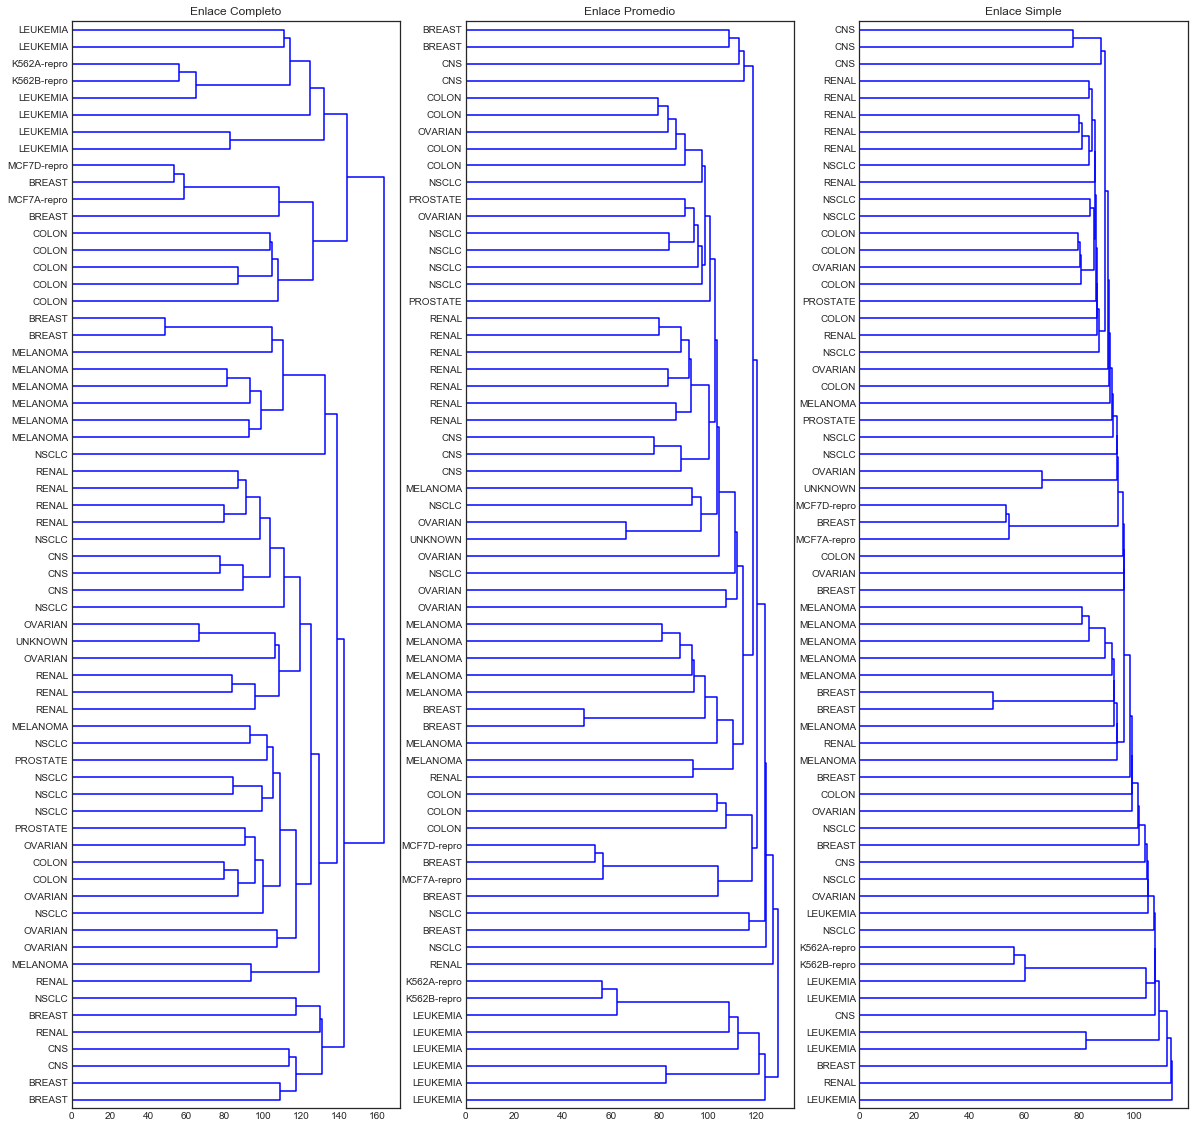

In [32]:
X= pd.DataFrame(scale(NCI60_X), index=y.type, columns=NCI60_X.columns)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Enlace Completo')
ax2.set_title('Enlace Promedio')
ax3.set_title('Enlace Simple');

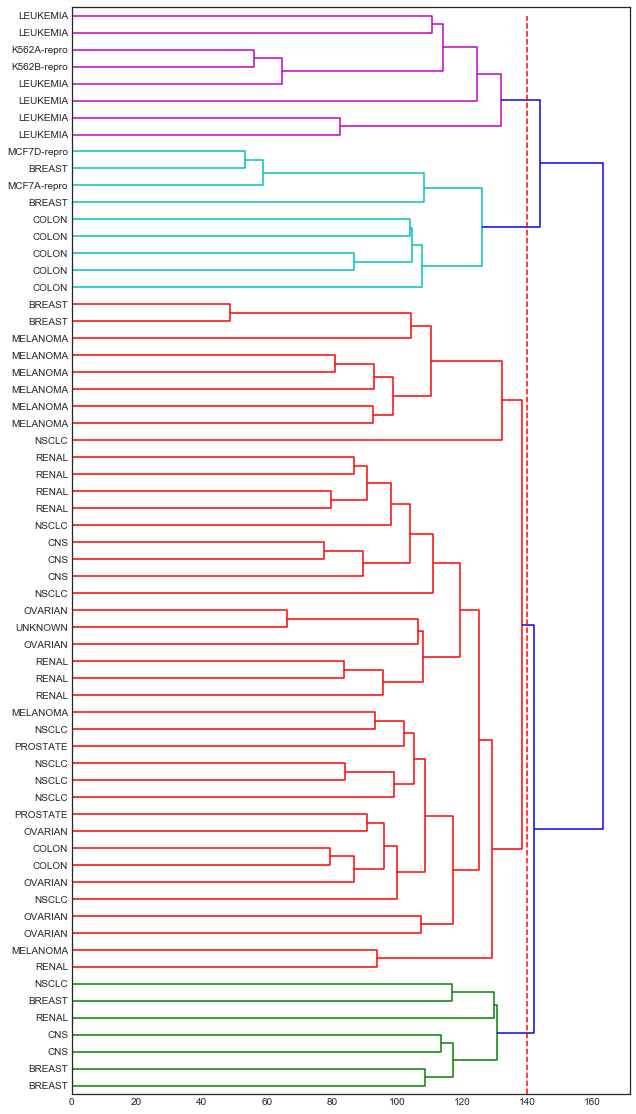

In [33]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

#### K-Means

In [34]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
km4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [36]:
# Número de Observaciones por grupo o cluster
pd.Series(km4.labels_).value_counts().sort_index()

0     8
1    23
2    24
3     9
dtype: int64

#### Jerárquico

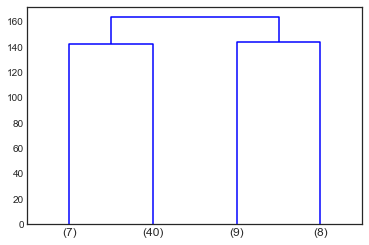

In [37]:
# Número de Observaciones por grupo o cluster jerárquico
cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', p=4, show_leaf_counts=True)

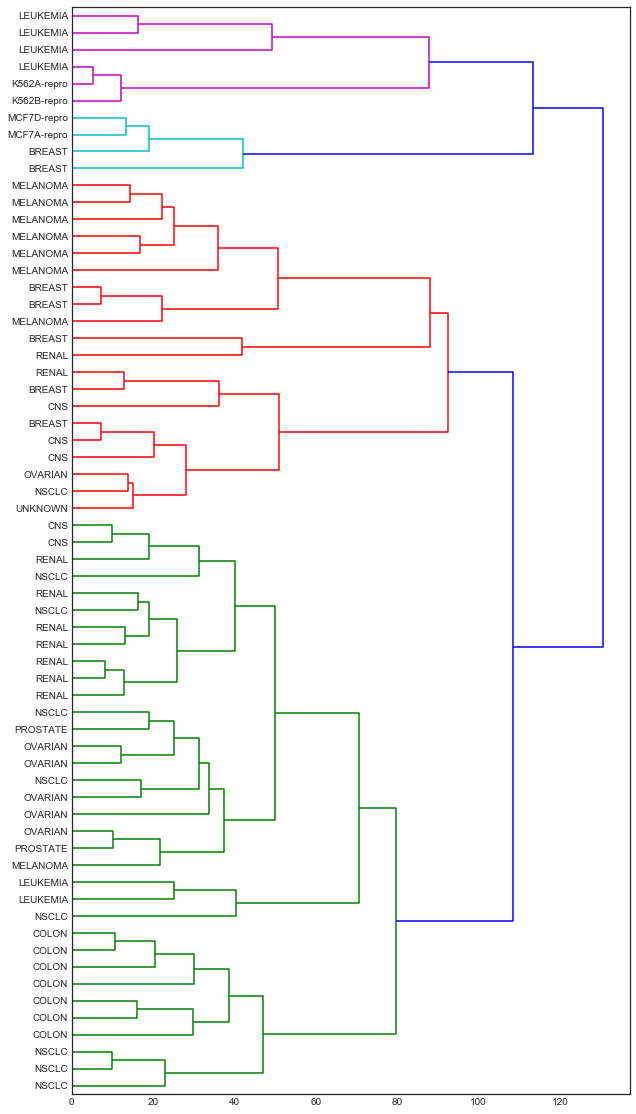

In [38]:
# Agrupamiento Jeráquico basado de 1 a 5 componentes principales
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), 
                labels=y.type.values, orientation='right', color_threshold=100, leaf_font_size=10)

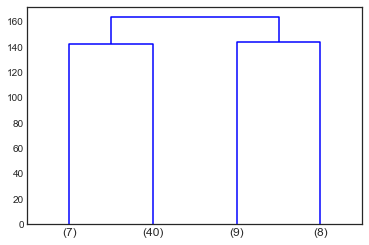

In [39]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df2_plot), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)

### En R
``` R
library (ISLR)

(nci.labs=NCI60$labs)
(nci.data=NCI60$data)
dim(nci.data)

# examen de los tipos de cancer para las líneas celulares
nci.labs
table(nci.labs)

# PCA
# -------------------------------------------------------------------------------
pr.out=prcomp(nci.data, scale=TRUE)
summary(pr.out)

Cols=function(vec){
cols=rainbow(length(unique(vec)))
return (cols[as.numeric(as.factor(vec))])
}

cbind(Cols(nci.labs), nci.labs) 

par(mfrow =c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch =19, xlab ="Z1", ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch =19, xlab ="Z1", ylab="Z3")

summary(pr.out)
plot(pr.out)

pr.out$sdev^2

pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve, type ="o", ylab=" PVE ", xlab=" Principal Component ", col="blue")
plot(cumsum(pve), type="o", ylab =" Cumulative PVE ", xlab="
Principal Component ", col="brown3")

summary(pr.out)$importance[2,]
summary(pr.out)$importance[3,]

# Clustering: Herarchical
# -------------------------------------------------------------------------------
sd.data=scale(nci.data)

par(mfrow =c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main=" Complete
Linkage ", xlab="", sub="", ylab="", cex=.5)
plot(hclust(data.dist, method="average"), labels=nci.labs ,
main=" Average Linkage ", xlab="", sub="", ylab="", cex=.5)
plot(hclust(data.dist, method="single"), labels=nci.labs ,
main=" Single Linkage ", xlab="", sub="", ylab="", cex=.5)

hc.out =hclust(dist(sd.data))
hc.clusters=cutree(hc.out ,4)
table(hc.clusters, nci.labs)

par(mfrow =c(1,1))
plot(hc.out, labels=nci.labs, cex=.6)
abline(h=139, col ="red")

cutree(hc.out,4)
hc.out

# Clustering: K-means
# -------------------------------------------------------------------------------
set.seed (2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters =km.out$cluster
table(km.clusters, hc.clusters)

# Clustering using PCA
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main=" Hier. Clust. on First Five Score Vectors ", cex=.6)
table(cutree(hc.out ,4), nci.labs)
```

### Información adicional de soporte

- [K-means Clustering (Video duración 17:17)](https://www.youtube.com/watch?v=aIybuNt9ps4)
- [Hierarchical Clustering (Video duración 14:45)](https://www.youtube.com/watch?v=Tuuc9Y06tAc)
- [Breast Cancer Example of Hierarchical Clustering (Video duración 9:24)](https://www.youtube.com/watch?v=yUJcTpWNY_o)
- [Lab in R: Principal Components Analysis (Video duración 6:28)](https://www.youtube.com/watch?v=lFHISDj_4EQ)
- [Lab in R: K-means Clustering (Video duración 6:31)](https://www.youtube.com/watch?v=YDubYJsZ9iM)
- [Lab in R: Hierarchical Clustering (Video duración 6:33)](https://www.youtube.com/watch?v=4u3zvtfqb7w)


[< Aprendizaje no supervisado](Aprendizaje%20no%20supervisado.ipynb#Aprendizaje-no-supervisado) | [Menú Principal](Aprendizaje Estadistico y Automatico con Python.ipynb) | [ >]()